In [1]:
import sys
sys.path.append('..')

import torch
from torch import nn
import matplotlib.pyplot as plt
import matplotlib.patches as patches


from ccn import Constraint, ConstraintsGroup, Clause, ClausesGroup
from shapes import Rectangle
from experiment import Experiment

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

2024-02-05 09:43:39.690308: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


cpu


### Define the shapes

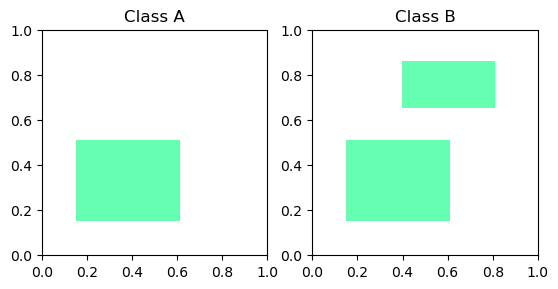

In [2]:
rect0 = Rectangle(0.15, 0.6, 0.15, 0.5)
rect1 = Rectangle(0.4, 0.8, 0.65, 0.85)
combined = rect0 | rect1
shapes = [rect0, combined]

fig, ax = plt.subplots(1, len(shapes))
ax[0].set_title("Class A")
ax[1].set_title("Class B")
for i, shape in enumerate(shapes):
  shape.plot(ax[i], full=True)
plt.show()

constraints1 = [ConstraintsGroup([Constraint('1 :- 0')])]

### Define the neural network

In [25]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 20),
            nn.Tanh(),
            nn.Linear(20, 2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

model1 = NeuralNetwork()
print(model1)

NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): Tanh()
    (2): Linear(in_features=20, out_features=2, bias=True)
    (3): Sigmoid()
  )
)


### Train and test the model

In [26]:
# model1 = torch.load('./models/rectangles-0.0011049-1652127777.pth')
experiment = Experiment('rectangles', model1, shapes, constraints1)
experiment.run(400, 'cpu', progressive=0)
# experiment.save(dir='./models/')

Epoch 1, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.789835 [    0/ 2500]
Test Error: 
 Accuracy: 83.9%, 76.0%
 Avg loss: 0.000214 

Epoch 2, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.529411 [    0/ 2500]
Test Error: 
 Accuracy: 83.9%, 76.0%
 Avg loss: 0.000197 

Epoch 3, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.480144 [    0/ 2500]
Test Error: 
 Accuracy: 83.9%, 76.0%
 Avg loss: 0.000210 

Epoch 4, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.508722 [    0/ 2500]
Test Error: 
 Accuracy: 83.9%, 76.0%
 Avg loss: 0.000212 

Epoch 5, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.512350 [    0/ 2500]
Test Error: 
 Accuracy: 83.9%, 76.0%
 Avg loss: 0.000202 

Epoch 6, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.490881 [    0/ 2500]
Test Erro

In [ ]:
experiment.save(dir='./models/')

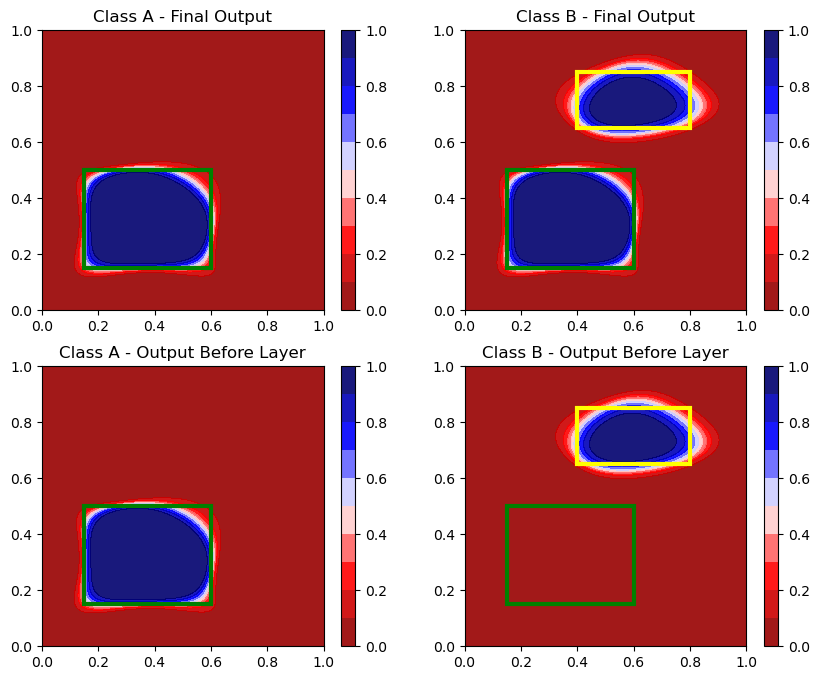

In [27]:
import numpy as np
x = np.linspace(0, 1, 1000)
y = x
z = torch.tensor([[[i, j] for i in x] for j in y]).reshape(-1, 2).float()
out = model1(z).detach().reshape(len(x), len(y), 2)
z0 = out[:, :, 0]
z1 = out[:, :, 1]
out = model1(z)
fout = experiment.clayer(out)
fout = fout.detach().reshape(len(x), len(y), 2)
fz0 = fout[:, :, 0]
fz1 = fout[:, :, 1]

cmap = plt.get_cmap('seismic_r')
# levels = np.linspace(0,10,1)
# print(levels)

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
cs0 = ax[0,0].contourf(x, y, z0, cmap=cmap, alpha=0.9, levels=10, vmin=0, vmax=1.0)
ax[0,0].set_title("Class A - Final Output")
cs3 = ax[0,1].contourf(x, y, fz1, cmap=cmap, alpha=0.9, levels=10, vmin=0, vmax=1.0)
ax[0,1].set_title("Class B - Final Output")
cs2 = ax[1,0].contourf(x, y, fz0, cmap=cmap, alpha=0.9, levels=10, vmin=0, vmax=1.0)
ax[1,0].set_title("Class A - Output Before Layer")
cs1 = ax[1,1].contourf(x, y, z1, cmap=cmap, alpha=0.9, levels=10, vmin=0, vmax=1.0)
ax[1,1].set_title("Class B - Output Before Layer")

cbar0 = fig.colorbar(cs0)
cbar1 = fig.colorbar(cs1)
cbar2 = fig.colorbar(cs2)
cbar3 = fig.colorbar(cs3)

# Add GT rectangles
rect0_patch = patches.Rectangle(rect0.get_left_low_corner(),rect0.get_width(),rect0.get_height(),linewidth=3,edgecolor='green',facecolor='none')
a = ax[0,0].add_patch(rect0_patch)
rect0_patch = patches.Rectangle(rect0.get_left_low_corner(),rect0.get_width(),rect0.get_height(),linewidth=3,edgecolor='green',facecolor='none')
a = ax[0,1].add_patch(rect0_patch)
rect0_patch = patches.Rectangle(rect0.get_left_low_corner(),rect0.get_width(),rect0.get_height(),linewidth=3,edgecolor='green',facecolor='none')
a = ax[1,0].add_patch(rect0_patch)
rect0_patch = patches.Rectangle(rect0.get_left_low_corner(),rect0.get_width(),rect0.get_height(),linewidth=3,edgecolor='green',facecolor='none')
a = ax[1,1].add_patch(rect0_patch)

rect1_patch = patches.Rectangle(rect1.get_left_low_corner(),rect1.get_width(),rect1.get_height(),linewidth=3,edgecolor='yellow',facecolor='none')
a = ax[0,1].add_patch(rect1_patch)
rect1_patch = patches.Rectangle(rect1.get_left_low_corner(),rect1.get_width(),rect1.get_height(),linewidth=3,edgecolor='yellow',facecolor='none')
a = ax[1,1].add_patch(rect1_patch)



In [28]:
# Probably it would be good to have a "violations counter" (just to show that there are indeed no violations)
# And maybe see when you are creating the video, but it might be good to split the top row from the bottom row
# Also, I think you can train the network in real time, I tried with 20 neurons and 400 epochs and it trains almost instantly  